### Visualizando relaciones entre variables

Después de examinar las variables por separado, probablemente nos interesará ver si existen interacciones o dependencias entre dos variables. Cuando ambas variables son continuas, utilizamos un diagrama de dispersión (o _scatter plot_). En Seaborn podemos generarlo con `sns.jointplot()`.

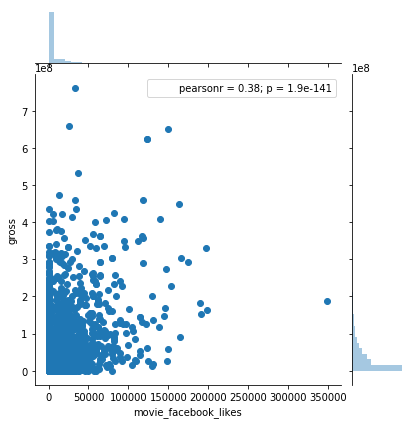

In [ ]:
# Vamos a cargar datos de películas
movies = pd.read_csv("../../Datasets/imdb_movie.csv")

# Veamos si hay interacción entre el número de "likes" en facebook
# y los ingresos brutos de taquilla que consigue una película
sns.jointplot('movie_facebook_likes', 'gross', data = movies)

Este tipo de gráficos nos muestra la distribución conjunta del par de variables, junto con las distribuciones o histogramas marginales de cada variable independiente. Además, nos indica cuál es el coeficiente de Pearson para la correlación lineal entre las variables.

En este caso tenemos algunos valores muy extremos que distorsionan el análisis. Probemos a hacer una transformación de variables tomando logaritmos.

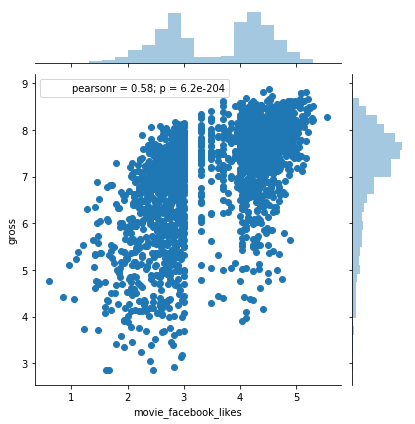

In [ ]:
# vamos a quedarnos con las películas que tienen datos de "likes"
movies_fb = movies.loc[movies['movie_facebook_likes'] > 0, ['movie_facebook_likes','gross']]

# aplicamos `log10` a las variables antes de pintar
sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb))

Si lo preferimos, podemos mostrar densidades de probabilidad estimadas en lugar de las observaciones e histogramas.

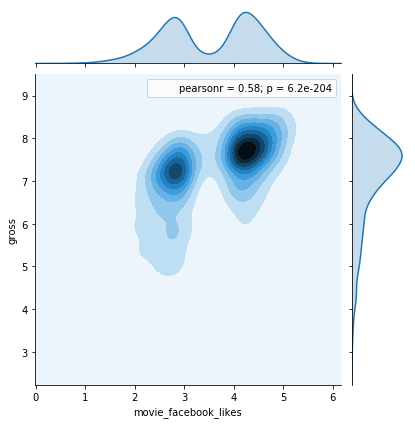

In [ ]:
sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb), kind="kde")

Una vez que hemos identificado una posible interacción entre variables, podemos estimar y pintar un modelo ajustado a las observaciones.

Con `sns.regplot()`, además de mostrar los puntos para cada observación, también se ajusta un modelo de regresión lineal para `y ~ x` (`gross ~ movie_facebook_likes` en este ejemplo) y pinta la recta correspondiente al ajuste con el intervalo de confianza al 95%. Si preferimos omitir este ajuste lineal, basta con incluir la opción '`fit_reg=False`'.


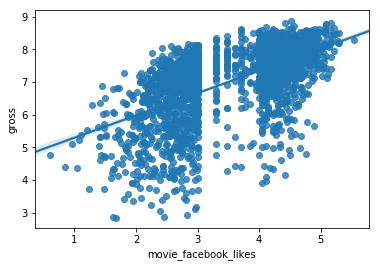

In [ ]:
# aplicamos `log10` a las variables antes de pintar
sns.regplot('movie_facebook_likes', 'gross', 
            data = np.log10(movies_fb))

Ahora parece que tenemos una relación algo más evidente entre ambas variables.

Cuando queremos ajustar modelos entre dos variables también podemos usar la función `sns.lmplot()`. En realidad, `sns.regplot()` es una versión reducida de ésta. Con `sns.lmplot()` podemos controlar distintos parámetros del ajuste, tipo de modelo, emplear regresión robusta, etc.